# Four Room Gridworld

The objective is to navigate from anywhere in the grid to the top leftmost cell in the gridworld. Agent learns a policy using Value Iteration.  

In [1]:
import numpy as np
import pprint
import sys
import matplotlib.pyplot as plt
if "../" not in sys.path:
  sys.path.append("../") 
from gridworld import GridworldEnv

The environment is defined in the below block. The maze is of 13x13 size. Each room has one door using which the agent can exit that correspoinding room. The environment is assumed to be deterministic. The Yellow colored spot is the final goal and the light Blue colored pixels are the walls. 

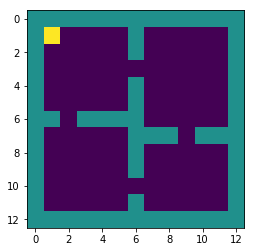

In [2]:
#pp = pprint.PrettyPrinter(indent=2)
env = GridworldEnv()
plt.imshow(env.grid)

In [ ]:
This block defines the whole algorithm. The algorithm runs for 'count' number of times or till the change in the policy is too less.

In [ ]:
def value_iteration(env, theta=0.1, discount_factor=0.99):
    """
    Value Iteration Algorithm.
    
    Args:
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
        
    Returns:
        A tuple (policy, V) of the optimal policy and the optimal value function.
    """
    
    def one_step_lookahead(state, V):
        """
        Helper function to calculate the value for all action in a given state.
        
        Args:
            state: The state to consider (int)
            V: The value to use as an estimator, Vector of length env.nS
        
        Returns:
            A vector of length env.nA containing the expected value of each action.
        """
        #-----------------------------------TO BE IMPLEMENTED BY PARTICIPANTS------------------------#
        A = np.zeros(env.nA)
        for a in range(env.nA):
            for prob, next_state, reward, done in env.P[state][a]:
                A[a] += prob * (reward + discount_factor * V[next_state])    
        #----------------------------------------------------------------------------------------------#
        
        return A
    
    V = np.zeros(env.nS)
    count = 0;
    while True:
        #-----------------------------------TO BE IMPLEMENTED BY PARTICIPANTS------------------------#
        # Stopping condition
        delta = 0
        # Update each state...
        for s in range(env.nS):
            # Do a one-step lookahead to find the best action
            A = one_step_lookahead(s, V)            
            best_action_value = np.max(A)
            # Calculate delta across all states seen so far            
            delta = max(delta, np.abs(best_action_value - V[s]))
            
            # Update the value function. Ref: Sutton book eq. 4.10. 
            V[s] = best_action_value        
        # Check if we can stop 
        count += 1        
        if delta <= theta or count == 20:
            break
        #----------------------------------------------------------------------------------------------#
    
    # Create a deterministic policy using the optimal value function
    policy = np.zeros([env.nS, env.nA])
    
    for s in range(env.nS):
        # One step lookahead to find the best action for this state
        A = one_step_lookahead(s, V)
        #print("s=",s,"A=",A)
        best_action = np.argmax(A)
        # Always take the best action
        policy[s, best_action] = 1.0
    
    return policy, V



This block is the trigger code. At the end of this section policy along with value function is being displayed over the entire grid. The value of a state is represented as a heat map. Note that the value of states near the goal state is high and it gradually decreases as we move to away from the goal.

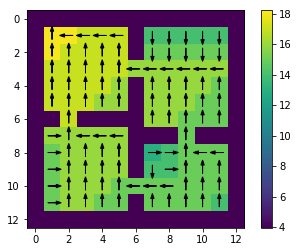

In [34]:
policy, v = value_iteration(env)

# print("Policy Probability Distribution:")
# print(policy)
print("")
action = np.argmax(policy,1)
mat = -1*np.load('layout.npy')
#plt.imshow(mat)


# plt.savefig('direc.png')


ax = plt.axes()
for s in range(104):   
    t = env.tocell[s]
    mat[t] = v[s] 
    #print(v[s])

ax = plt.axes()
for s in range(104):   
    
    cell = env.tocell[s]
    y, x = cell
    dy, dx = env.directions[action[s]]*0.5
    ax.arrow(x-0.5*dx, y-0.5*dy, dx, dy, head_width = 0.2, fc = 'k', ec = 'k')
    
plt.imshow(mat)
plt.clim(np.min(v)-10,np.max(v))
plt.colorbar()
#plt.savefig('heat.png')


# print("Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):")
# print(np.reshape(np.argmax(policy, axis=1), env.shape))
# print("")

# print("Value Function:")
# print(v)
# print("")

# print("Reshaped Grid Value Function:")
# print(v.reshape(env.shape))
print("")